In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
orange, purple, elm ='#FFCC00', '#666599', '#217C7E'
blue, red, grey, green ='#336699', '#9A3334', '#AAAAAA', '#335333'
%matplotlib inline
mydpi=600
s=12

__author__ = 'HK Dambanemuya'
__version__ = 'Python3'

In [2]:
print ("Reading News...")
news = pd.read_csv("../Data/Fusion/news.csv")
news = news[news['length']>100]
news['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(news['date'])]

print ("Reading Blogs...")
blogs = pd.read_csv("../Data/Fusion/blogs.csv")
blogs = blogs[blogs['length']>100]
blogs['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(blogs['date'])]

print ("Reading Discussions...")
discussions = pd.read_csv("../Data/Fusion/discussions.csv")
discussions = discussions[discussions['length']>100]
discussions['date'] = [datetime.strftime(pd.to_datetime(date), '%Y-%m-%d') for date in tqdm_notebook(discussions['date'])]

Reading News...



Reading Blogs...



Reading Discussions...


In [3]:
# Select countries common in all 3 data sets
country_map = Counter(set(news['country']))+Counter(set(blogs['country']))+ Counter(set(discussions['country']))
common_locations = []
for k,v in tqdm_notebook(country_map.items()):
    if (v == 3) and (k==k):
        common_locations.append(k)
print("Common Countries:", len(common_locations))


Common Countries: 79


In [4]:
# Filter data by common countries
news = news[news['country'].isin(common_locations)]
blogs = blogs[blogs['country'].isin(common_locations)]
discussions = discussions[discussions['country'].isin(common_locations)]
print ("News:", len(news))
print ("Blogs:", len(blogs))
print ("Discussions:", len(discussions))

News: 2277563
Blogs: 946755
Discussions: 409091


In [5]:
news['platform']= ['news']*len(news)
blogs['platform']= ['blogs']*len(blogs)
discussions['platform']= ['discussions']*len(discussions)

In [6]:
columns = ['date', 'title', 'text', 'theme', 'platform', 'source', 'country']
theme_labels = ['medical supplies', 'ppe', 'recommendations', 'restrictions', 'seasonal flu']

frames = []

for platform in tqdm_notebook([news, blogs, discussions]):

    for theme in tqdm_notebook(theme_labels):
        frames.append(platform[platform['theme'].str.contains(theme)][columns])
data = pd.concat(frames)

In [7]:
print (len(data[data['platform']=='news']), len(data[data['platform']=='blogs']), len(data[data['platform']=='discussions']))
print (sum([len(data[data['platform']=='news']), len(data[data['platform']=='blogs']), len(data[data['platform']=='discussions'])]))

751569 283333 87592
1122494


In [8]:
print ("Total LIWC Volume:", len(data))
data.to_csv("../Data/Fusion/liwc_source.csv", index=False)

Total LIWC Volume: 1122494


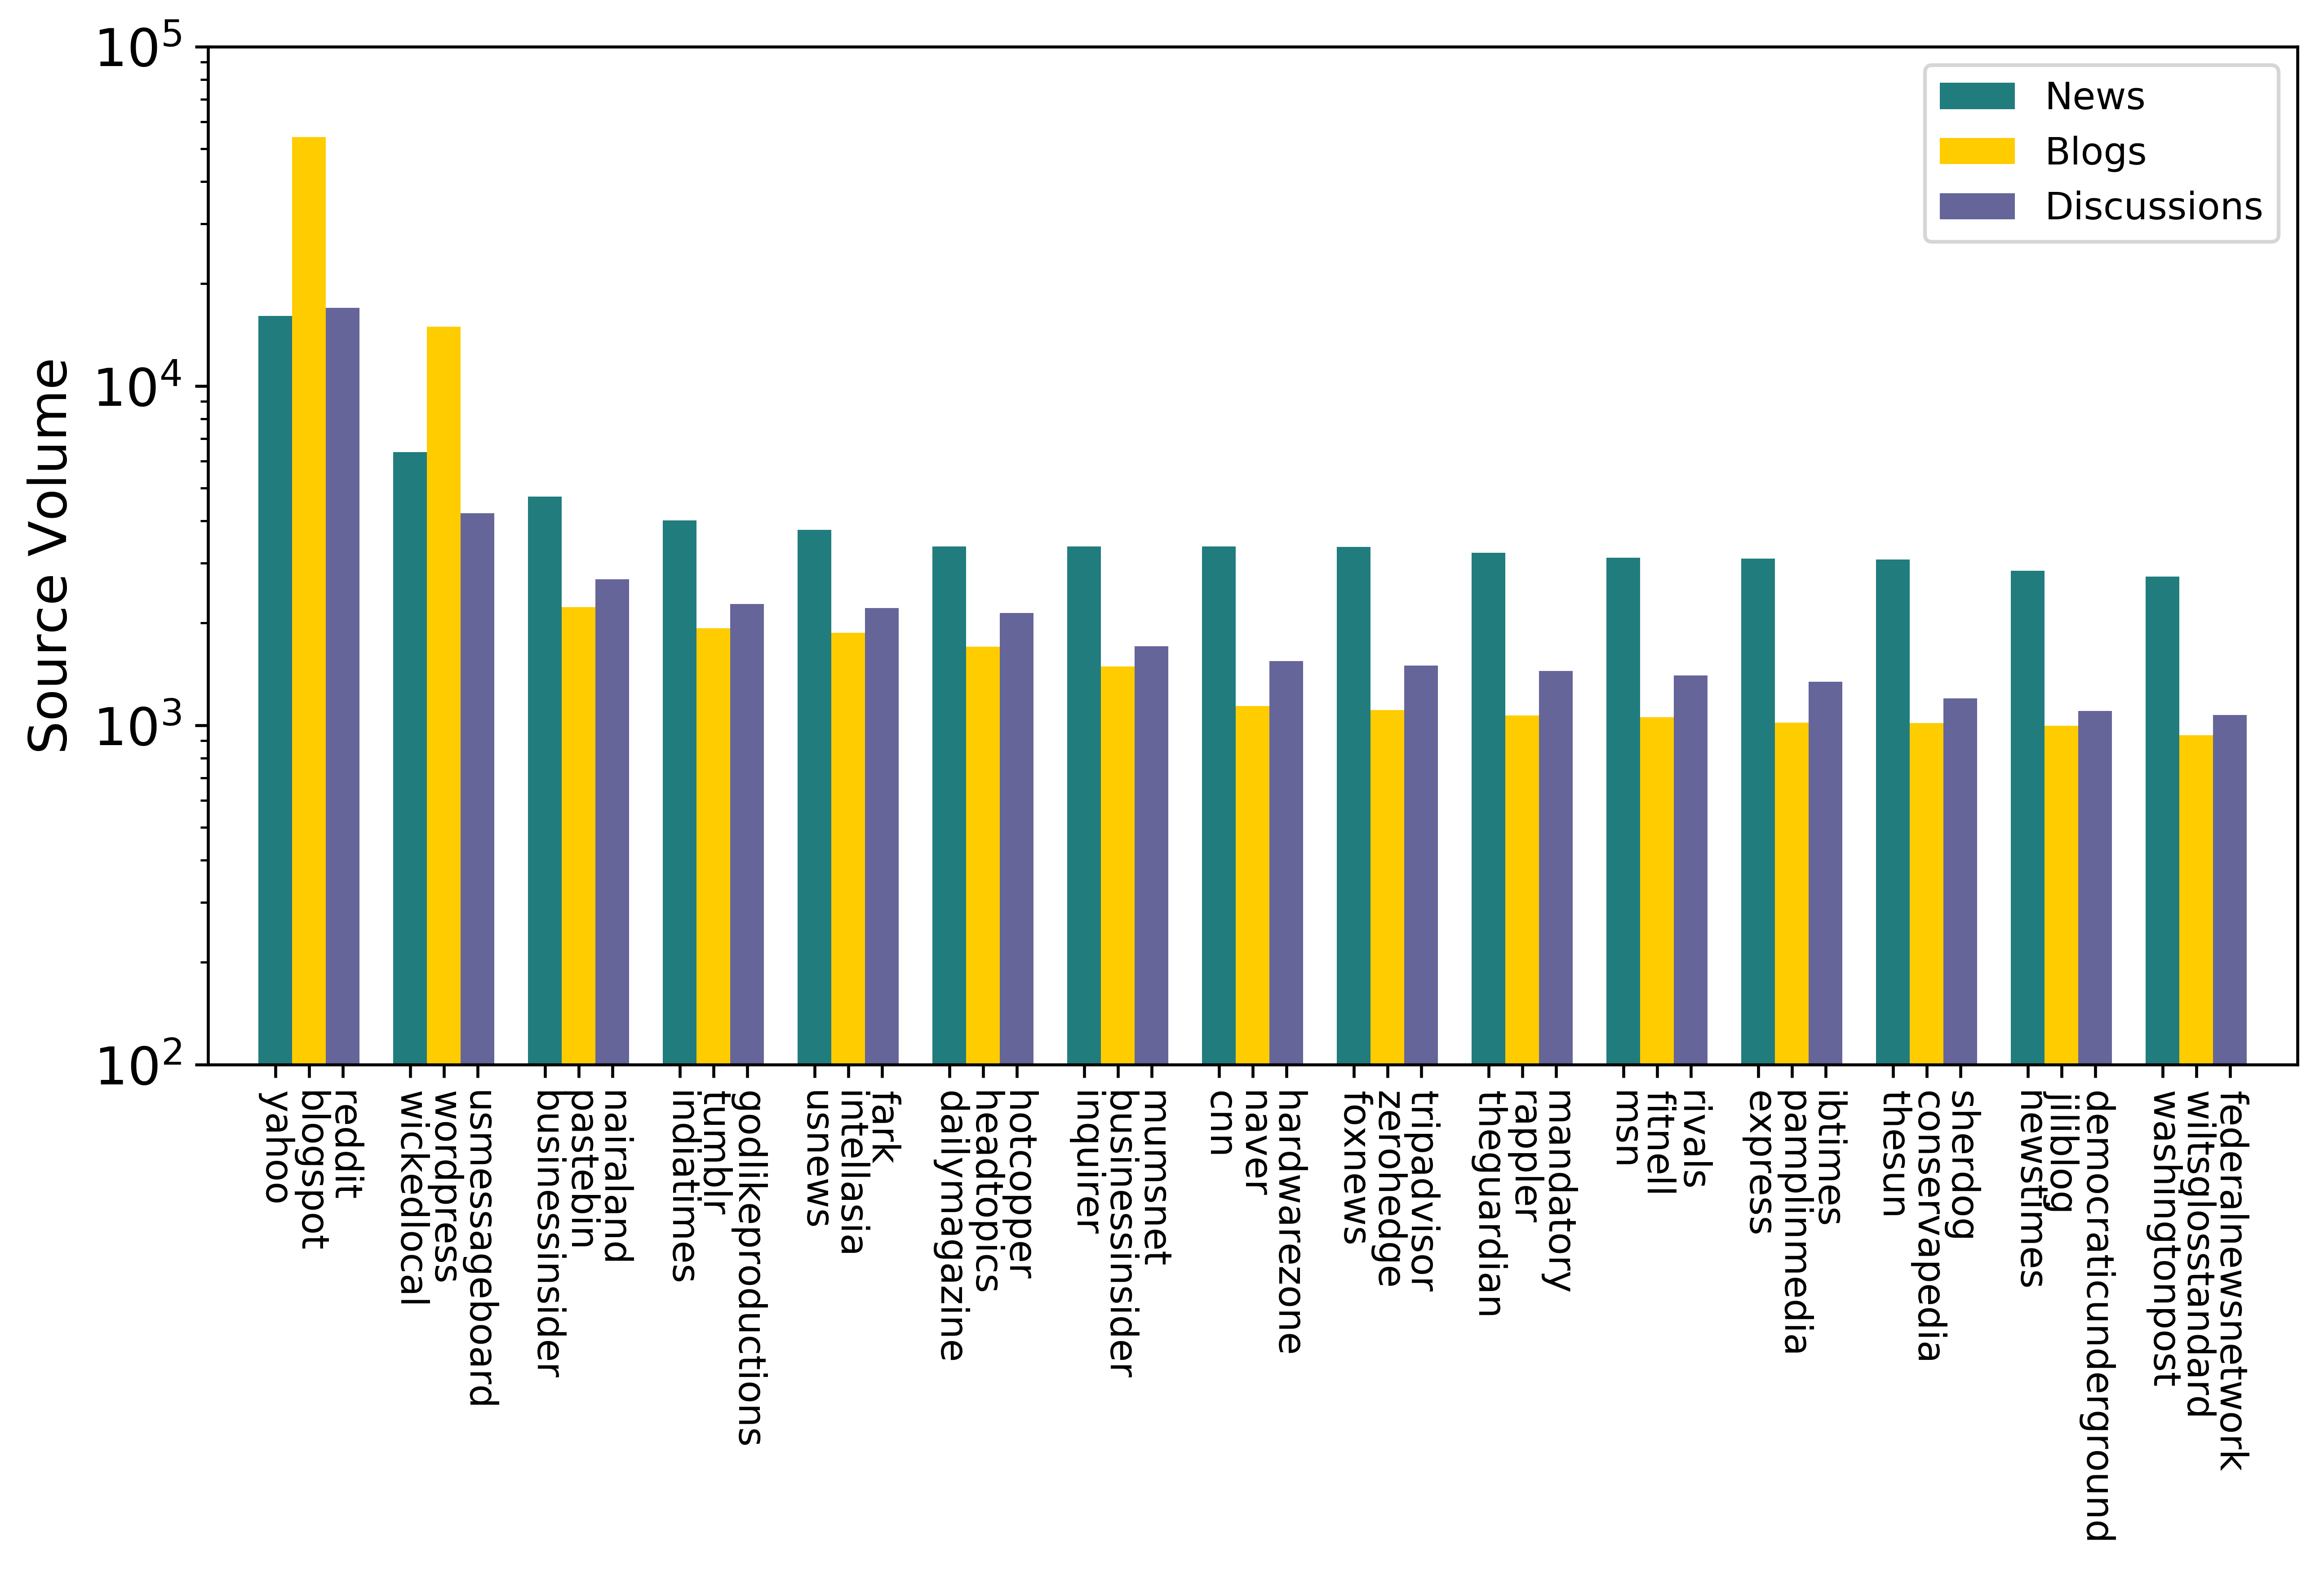

In [9]:
ind = np.arange(15)    
width = 0.25

list1= ind
list2 = ind+width
list3 = ind+width*2
labels1 = list(dict(Counter(data[data['platform']=='news']['source']).most_common(15)).keys())
labels2 = list(dict(Counter(data[data['platform']=='blogs']['source']).most_common(15)).keys())
labels3 = list(dict(Counter(data[data['platform']=='discussions']['source']).most_common(15)).keys())
indall = []
labelsall = []
for i in range(len(list1)):
    indall.append(list1[i])
    indall.append(list2[i])
    indall.append(list3[i])
    
    labelsall.append(labels1[i])
    labelsall.append(labels2[i])
    labelsall.append(labels3[i])

fig = plt.figure(figsize=(10,5), dpi=mydpi)

plt.bar(ind, 
        dict(Counter(data[data['platform']=='news']['source']).most_common(15)).values(), 
        width, color=elm, label='News')

plt.bar(ind+width, 
        dict(Counter(data[data['platform']=='blogs']['source']).most_common(15)).values(),
        width, color=orange, label='Blogs')

plt.bar(ind+width*2, 
        dict(Counter(data[data['platform']=='discussions']['source']).most_common(15)).values(), 
        width, color=purple, label='Discussions')

plt.xticks(indall,labelsall, rotation=270)
plt.ylabel("Source Volume", fontsize=14)
plt.ylim(1e2,1e5)
plt.xlim(-0.5,15)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.legend(loc='best')
plt.show()